In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import glob
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/tribiosis/miniconda3/envs/plt2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def weight_df(files, extension, method):
    if len(files) > 1:
        w = pd.read_csv(files[0], sep="\t")
        for file in files[1:]:
            w = pd.concat([w, pd.read_csv(file, sep="\t")], axis=0)
    else:
        w = pd.read_csv(files, sep="\t")
    w = w.groupby("FeatureName").mean()
    w["mean"] = w.mean(axis=1)
    w["mean"] = abs(w["mean"])
    w = w.sort_values(by=["mean"], ascending=False)
    w["method"] = method
    return w[0:10]

### PXD000561

In [13]:
files = [i for i in glob.glob("/home/tribiosis/Master/master_thesis/ionbot/features561/non-processed/"+"*a.txt")]
w = weight_df(files, "*a.txt", "non-processed") #non-processed

In [14]:
files = [i for i in glob.glob("/home/tribiosis/Master/master_thesis/ionbot/features561/precrem/"+"*b.txt")]
w2 = weight_df(files, "*b.txt", "precursor removed") #precursor removed

In [15]:
concat = pd.concat([w, w2], axis=0)
concat = concat.reset_index()

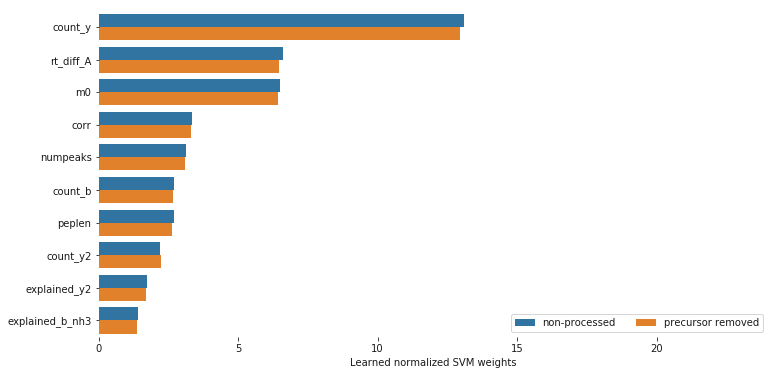

In [16]:
f, ax = plt.subplots(figsize=(12, 6))

# Plot the total crashes
sns.set_color_codes("colorblind")
sns.barplot(x="mean", y="FeatureName", data=concat, hue="method")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Learned normalized SVM weights")
sns.despine(left=True, bottom=True)


### PXD001468

In [17]:
files = [i for i in glob.glob("/home/tribiosis/Master/master_thesis/ionbot/features1468/non-processed/"+"*a.txt")]
w = weight_df(files, "*a.txt", "non-processed") #non-processed
files = [i for i in glob.glob("/home/tribiosis/Master/master_thesis/ionbot/features1468/precrem02Da/"+"*b.txt")]
w2 = weight_df(files, "*b.txt", "precursor removed") #precursor removed
concat = pd.concat([w, w2], axis=0)
concat = concat.reset_index()

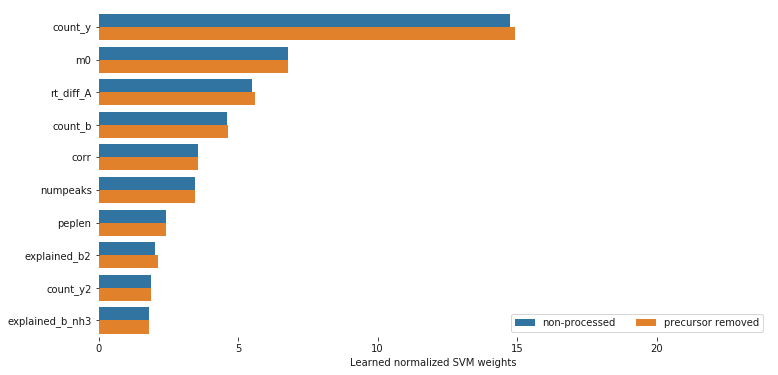

In [18]:
f, ax = plt.subplots(figsize=(12, 6))

# Plot the total crashes
sns.set_color_codes("colorblind")
sns.barplot(x="mean", y="FeatureName", data=concat, hue="method")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Learned normalized SVM weights")
sns.despine(left=True, bottom=True)